##  The Problem Statement:


Snap-Shot LLC.  is a startup which specializes in building mirrorless digital cameras.  The company is planning to introduce a new line of above full frame digital cameras. Based on historical statistics of digital camera sales, a person earning more than specific income is more likely to buy an expensive camera.  Company decides to launch a marketing camping to targeted to specific set of potential customers who earn more than $50000 annually.

### Solution:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import vtreat
import vtreat.util
from pprint import pprint
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score, precision_score, recall_score,confusion_matrix
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_pickle('df.pkl')
df_test = pd.read_pickle('df_test.pkl')

### 3. Imbalance in data

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

#### 3.1 Check for imbalance data.

<p>Looking at dataset, our current dataset is imbalanced with aprox 95% of individuals earning less than 50000. Which means we will get around 94% accuracy even if there is no model!!! </p>

To deal with imbalanced dataset, following methodologies are implemented
<b><I>
1. Change the metrics for evaluating model.<br>
2. Resampling the data.<br>
</I>
</b>

<b> Metrics: </b><br>
Since the dataset is imbalance, accuracy is not abe right metrics for measuring model's performance.Metrics that can provide a better insights are
<b><br><br>
    a. Confusion Matrix <br>
    b. Precision <br>
    c. Recall <br>
    d. F1 <br>
</b>
<br>

<b> Resampling of data: </b><br>
Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
</p>


In [3]:
df_true = df[df.income == True]
df_false = df[df.income == False]
print ("Imabanced data set",(len(df_true)/ len(df))  * 100, "%" )

Imabanced data set 6.205800834991455 %


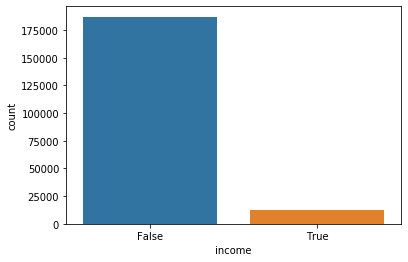

In [4]:
sns.countplot(x='income', data=df)

#### 3.2 : Define the metric used to evaluate model performance.

In [5]:
def evaluate_metrics(y_predict, y_test):
    """
    This function computes various model evaluation metrics for given data set.
    input: Arrays of true and predicted values.
    output: results of various metrics.
    
    """
    
    result = {}
    f1 = f1_score(y_test, y_predict)
    p = precision_score(y_test,y_predict)
    r = recall_score(y_test,y_predict)
    a = roc_auc_score(y_test,y_predict)
    c = confusion_matrix(y_test,y_predict)

    print ("F1 Score         : ", f1)
    print ("Precission Score : ", p)
    print ("Recall Score     : ", r)
    print ("roc_auc_score    : ",a )
    print ("Confusion Matrix : ",c)
    
    result['f1'] = f1
    result['p'] = p
    result['r'] = r
    result['a'] = a
    result['c'] = c
    
    return result

#### 3.3 Oversampling of minority class

In [6]:
from sklearn.utils import resample
def overample_minority(df, alpha):
    """
        This function oversamples the minority class to balance both the classes in the dataset.
        input: a dataframewith imbalanced classed.
        output: modified dataframe with balanced classes.
    """
    
# separate minority and majority classes
    above = df[df.income == True ]
    below = df[df.income == False]
    
    # upsample minority
    above_upsampled = resample(above,
                        replace=True, # sample with replacement
                        n_samples=int(len(below)/alpha), # match number in majority class
                        random_state=42) # reproducible results

    # combine majority and upsampled minority
    upsampled = pd.concat([above_upsampled, below])
    
    # check new class counts
    print(upsampled.income.value_counts())
  
    return upsampled

In [7]:
df_true = df[df.income == True]
df_false = df[df.income == False]
print ("Imabanced data set",(len(df_true)/ len(df))  * 100, "%" )

x=overample_minority(df,4)
x_true = x[x.income == True]
x_false = x[x.income == False]
print ("Imabanced data set",(len(x_true)/ len(x))  * 100, "%" )

Imabanced data set 6.205800834991455 %
False    187141
True      46785
Name: income, dtype: int64
Imabanced data set 19.99991450287698 %


### 4.  Data Exploration

#### 4.1  Is there any imbalance between different sexes in majority and minority classes.

<p> Looking at the chart below, in both the Sexes, the difference between both classes are approximately similar.

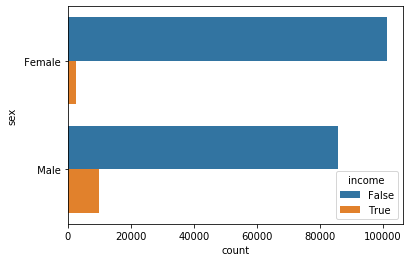

In [8]:
sns.countplot(y='sex',hue='income',data=df, order = df['sex'].value_counts().iloc[:10].index,orient='v')

#### 4.2 what is the impact of education on the income earned by an individual?

Following conclusions can be derived from the below charts

1. Children have a very less probability of earning more than 50k income. Hence these data points can be safely removed for training the model.

2. Maximum number of individuals earning income more than 50k have Bachelor's degree.

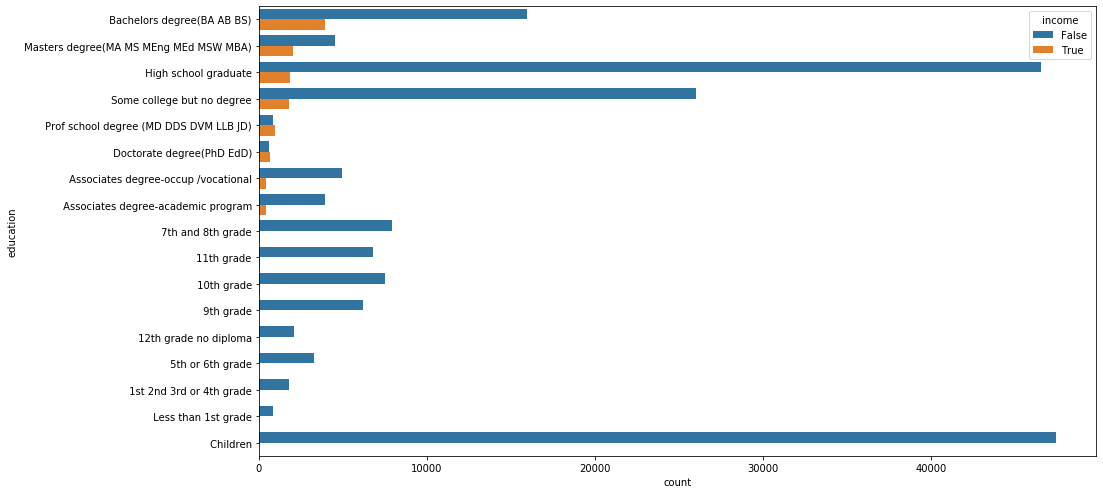

In [9]:
a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='education',hue='income',data=df, order = df_true['education'].value_counts().index,orient='v')

####  Remove entries for children

In [10]:
df = df[df.education != ' Children']
df_test = df_test[df_test.education != ' Children']

In [11]:
#Imbalance of the data reduced to aprox 8%
df_true = df[df.income == True]
df_false = df[df.income == False]
print ("Imabanced data set",(len(df_true)/ len(df))  * 100, "%" )

Imabanced data set 8.140643388274896 %


#### 4.3 Check for any corelation between race and income

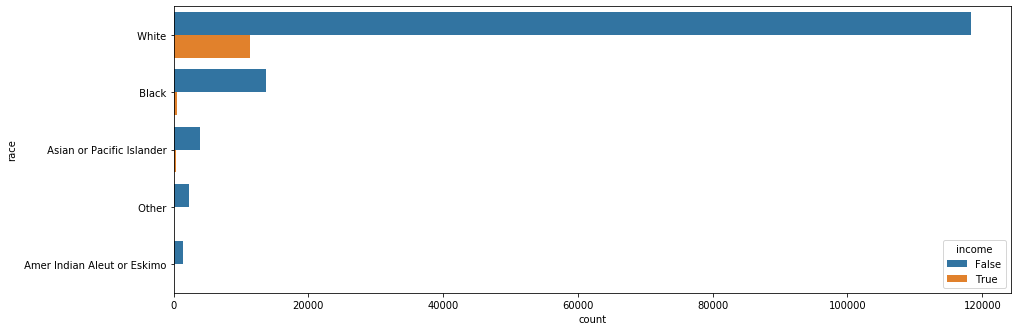

In [12]:
a4_dims = (15, 5.27)
fig, ax = plt.subplots(figsize=a4_dims)
#sns.countplot(y='race',hue='income',data=df_true, order = df_true['race'].value_counts().index,orient='v')
sns.countplot(y='race',hue='income',data=df, order = df['race'].value_counts().iloc[:10].index,orient='v')

#### 4.4 Check for any corelation between various categorical variables and income

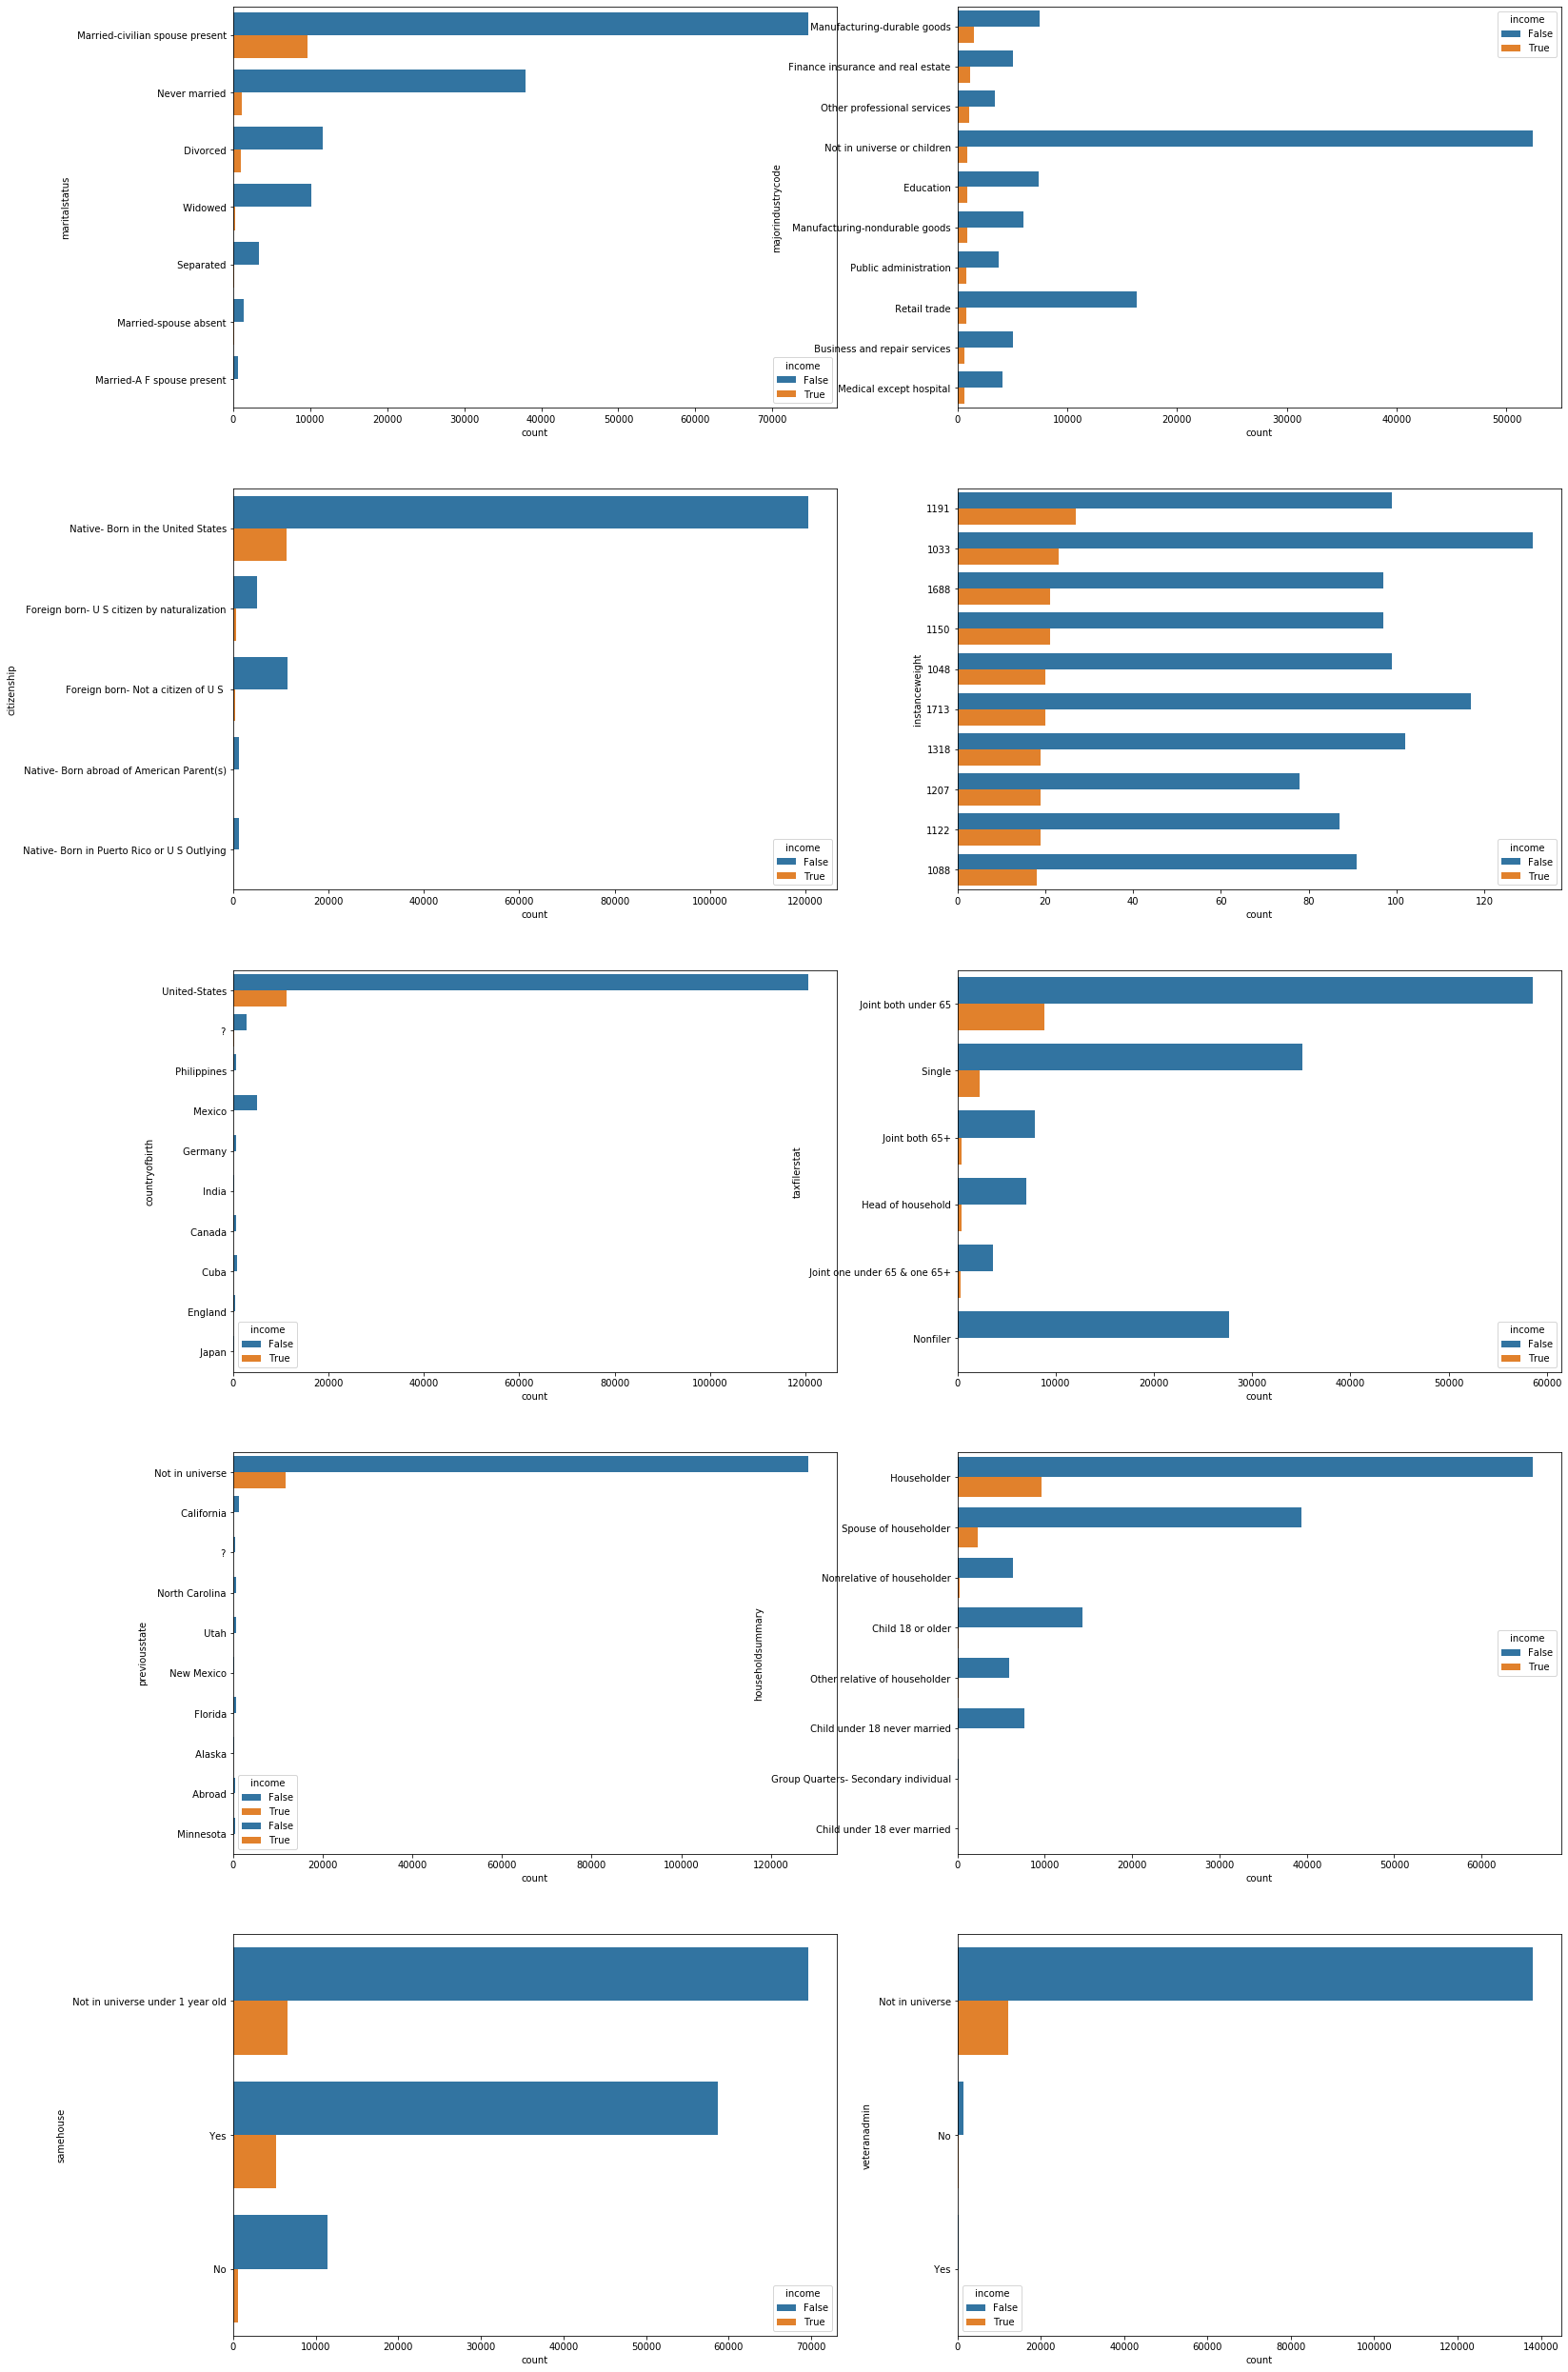

In [13]:
a4_dims = (25, 45)
fig, ax = plt.subplots(5,2,figsize=a4_dims)
sns.countplot(y='maritalstatus',hue='income',data=df, order = df_true['maritalstatus'].value_counts().iloc[:10].index,ax=ax[0, 0])
sns.countplot(y='majorindustrycode',hue='income',data=df, order = df_true['majorindustrycode'].value_counts().iloc[:10].index,ax=ax[0,1])
sns.countplot(y='citizenship',hue='income',data=df, order = df_true['citizenship'].value_counts().iloc[:10].index,ax=ax[1,0])
sns.countplot(y='instanceweight',hue='income',data=df, order = df_true['instanceweight'].value_counts().iloc[:10].index,ax=ax[1,1])
sns.countplot(y='countryofbirth',hue='income',data=df, order = df_true['countryofbirth'].value_counts().iloc[:10].index,ax=ax[2,0])
sns.countplot(y='taxfilerstat',hue='income',data=df, order = df_true['taxfilerstat'].value_counts().iloc[:10].index,ax=ax[2,1])
sns.countplot(y='previousstate',hue='income',data=df, order = df_true['previousstate'].value_counts().iloc[:10].index,ax=ax[3,0])
sns.countplot(y='householdsummary',hue='income',data=df, order = df_true['householdsummary'].value_counts().iloc[:10].index,ax=ax[3,1])
sns.countplot(y='previousstate',hue='income',data=df, order = df_true['previousstate'].value_counts().iloc[:10].index,ax=ax[3,0])
sns.countplot(y='samehouse',hue='income',data=df, order = df_true['samehouse'].value_counts().iloc[:10].index,ax=ax[4,0])
sns.countplot(y='veteranadmin',hue='income',data=df, order = df_true['veteranadmin'].value_counts().iloc[:10].index,ax=ax[4,1])

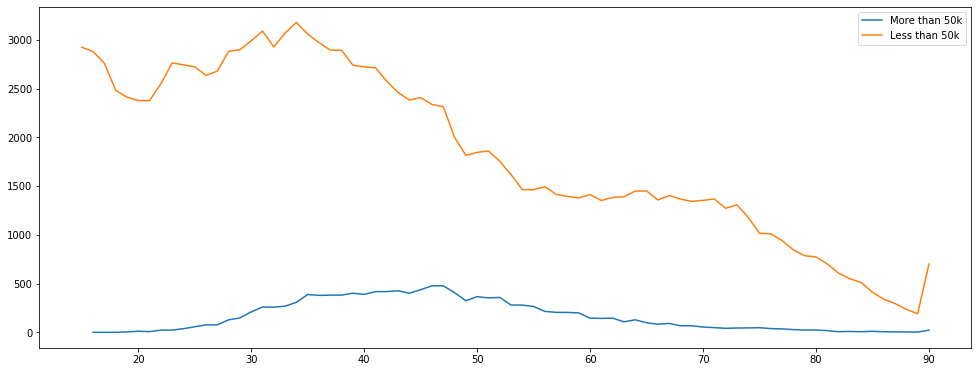

In [14]:
a4_dims = (16.7, 6.27)
fig, ax = plt.subplots(figsize=a4_dims)
f = df_false['age'].value_counts()
s = df_true['age'].value_counts()
_ = sns.lineplot(x=s.index,y=s.values,label='More than 50k')
_ = sns.lineplot(x=f.index,y=f.values,label='Less than 50k')
plt.show()

### Check for Stock dividends, Capital Gains and Losses

/Users/sdargude/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sdargude/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


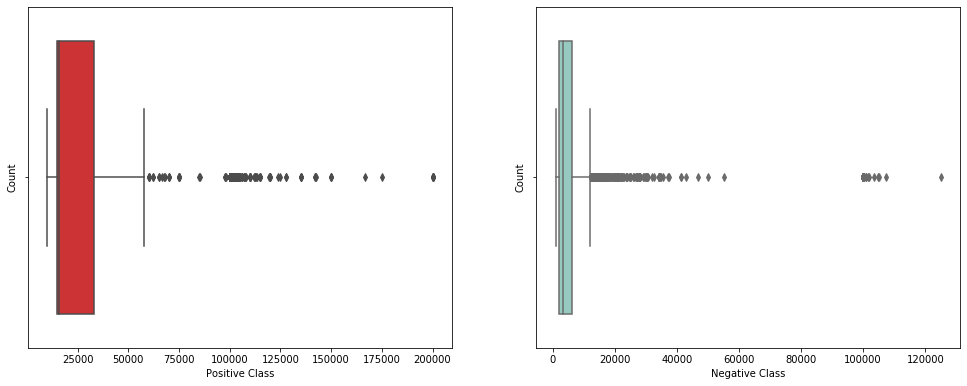

In [15]:
df_true = df[df.income == True]
df_false = df[df.income == False]
a4_dims = (16.7, 6.27)
fig, axes = plt.subplots(1,2,figsize=a4_dims)
df_true['total'] = df_true.capttaingain + df_true.stockdivdend  - df_true.capitalloss
df_false['total'] = df_false.capttaingain + df_false.stockdivdend - df_false.capitalloss

sns.boxplot(df_true.total[df_true.total > 10000 ], ax=axes[0],palette="Set1")
sns.boxplot(df_false.total[df_false.total > 1000 ], ax=axes[1],palette="Set3")
axes[0].set(xlabel='Positive Class', ylabel='Count')
axes[1].set(xlabel='Negative Class', ylabel='Count')

df_true = df_true.drop(columns = ['total', 'capttaingain','stockdivdend','capitalloss','instanceweight'])
df_false = df_false.drop(columns = ['total', 'capttaingain','stockdivdend','capitalloss','instanceweight'])

df = df.drop(columns = [ 'capttaingain','stockdivdend','capitalloss','instanceweight'])
df_test = df_test.drop(columns = [ 'capttaingain','stockdivdend','capitalloss','instanceweight'])

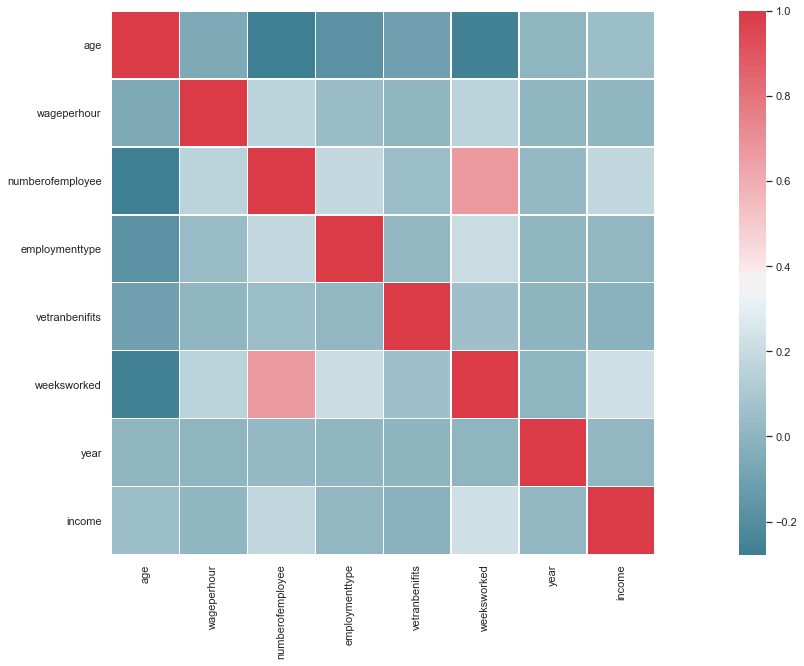

In [16]:
sns.set(style="white")
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap , square=True, linewidths=.5, ax=ax)

In [17]:
df.to_pickle('df.pkl')
df_test.to_pickle('df_test.pkl')